In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
eeg  = pd.read_csv('emotions.csv')
eeg

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [ ]:
eeg.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [ ]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [ ]:
eeg.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'.
eeg['label']= label_encoder.fit_transform(eeg['label'])
eeg.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [ ]:
eeg = eeg.dropna()

In [ ]:
y = eeg['label']
x = eeg.drop('label',axis=1)

In [ ]:
cols = x.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x = ms.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns=[cols])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.1869884 , 0.89684503, 0.34590433, ..., 0.17577128, 0.17577128,
        0.69298096],
       [0.2166008 , 0.9038547 , 0.58776713, ..., 0.2277306 , 0.2277306 ,
        0.54778741]])

In [ ]:
kmeans.inertia_

28811.32927395062

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1134 out of 2132 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.53


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

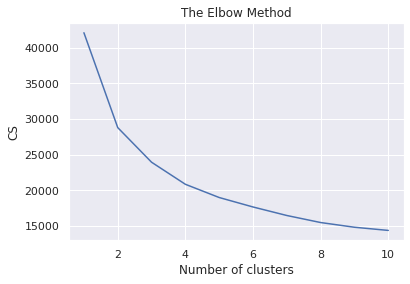

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Result: 1134 out of 2132 samples were correctly labeled.
Accuracy score: 0.53


In [ ]:
# kmeans = KMeans(n_clusters=5, random_state=0)

# kmeans.fit(x)

# # check how many of the samples were correctly labeled
# labels = kmeans.labels_

# correct_labels = sum(y == labels)
# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
# print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
# from sklearn.model_selection import GridSearchCV


In [ ]:
# model = kmeans
# params = {"n_clusters": range(2, 11)}
# grid = GridSearchCV(model,param_grid=params,cv=10)
# grid.fit(x,y)
# grid.best_estimator_

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error


In [ ]:
lasso = Lasso(alpha=10)

In [ ]:
lasso.fit(x, y)

Lasso(alpha=10)

In [ ]:
y_pred = lasso.predict(x)


In [ ]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}\n")

Mean Squared Error: 0.6641651031894934
Model Coefficients: [-0. -0.  0. ...  0.  0. -0.]



In [ ]:
x

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,0.180454,0.923225,0.376456,0.444898,0.565814,0.353339,0.498850,0.535578,0.371486,0.557823,...,0.557467,0.535431,0.262939,0.262939,0.535431,0.403846,0.679663,0.163852,0.163852,0.679663
1,0.246647,0.941139,0.614347,0.474636,0.557674,0.362177,0.501328,0.542980,0.374692,0.549829,...,0.582222,0.508900,0.241825,0.241825,0.508900,0.573504,0.533493,0.223368,0.223368,0.533493
2,0.192171,0.917466,0.339669,0.448105,0.559767,0.480484,0.504609,0.577769,0.530616,0.556700,...,0.287111,0.784014,0.135908,0.135908,0.784014,0.381624,0.680190,0.170242,0.170242,0.680190
3,0.208596,0.931542,0.507051,0.457143,0.561163,0.350671,0.497492,0.545347,0.371920,0.552688,...,0.443111,0.691610,0.130893,0.130893,0.691610,0.552137,0.525606,0.242141,0.242141,0.525606
4,0.245278,0.929623,0.622440,0.479009,0.561628,0.407742,0.486738,0.543052,0.442754,0.560201,...,0.575111,0.528912,0.271866,0.271866,0.528912,0.546581,0.522866,0.248699,0.248699,0.522866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,0.256502,0.935381,0.614470,0.489213,0.559070,0.354258,0.494082,0.542090,0.367534,0.553561,...,0.593333,0.509807,0.252868,0.252868,0.509807,0.536410,0.521654,0.259334,0.259334,0.521654
2128,0.212428,0.929623,0.420601,0.441108,0.560233,0.358387,0.500176,0.543610,0.376304,0.561314,...,0.230667,0.858844,0.090271,0.090271,0.858844,0.480556,0.606955,0.210497,0.210497,0.606955
2129,0.166310,0.910429,0.435929,0.445481,0.566744,0.366258,0.511523,0.546892,0.371431,0.559318,...,0.421333,0.731859,0.172518,0.172518,0.731859,0.670085,0.443098,0.232999,0.232999,0.443098
2130,0.213797,0.856686,0.418148,0.423732,0.565116,0.355581,0.501133,0.535458,0.370815,0.559418,...,0.480133,0.592404,0.238917,0.238917,0.592404,0.215385,0.822972,0.114103,0.114103,0.822972


In [ ]:
ridge = Ridge(alpha=100)
ridge.fit(x, y)
y_pred = ridge.predict(x)

In [ ]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}\n")

Mean Squared Error: 0.2725583892806937
Model Coefficients: [-0.04611167 -0.03046703  0.01206608 ...  0.00803559  0.00803559
 -0.02535008]



In [ ]:
x

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,0.180454,0.923225,0.376456,0.444898,0.565814,0.353339,0.498850,0.535578,0.371486,0.557823,...,0.557467,0.535431,0.262939,0.262939,0.535431,0.403846,0.679663,0.163852,0.163852,0.679663
1,0.246647,0.941139,0.614347,0.474636,0.557674,0.362177,0.501328,0.542980,0.374692,0.549829,...,0.582222,0.508900,0.241825,0.241825,0.508900,0.573504,0.533493,0.223368,0.223368,0.533493
2,0.192171,0.917466,0.339669,0.448105,0.559767,0.480484,0.504609,0.577769,0.530616,0.556700,...,0.287111,0.784014,0.135908,0.135908,0.784014,0.381624,0.680190,0.170242,0.170242,0.680190
3,0.208596,0.931542,0.507051,0.457143,0.561163,0.350671,0.497492,0.545347,0.371920,0.552688,...,0.443111,0.691610,0.130893,0.130893,0.691610,0.552137,0.525606,0.242141,0.242141,0.525606
4,0.245278,0.929623,0.622440,0.479009,0.561628,0.407742,0.486738,0.543052,0.442754,0.560201,...,0.575111,0.528912,0.271866,0.271866,0.528912,0.546581,0.522866,0.248699,0.248699,0.522866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,0.256502,0.935381,0.614470,0.489213,0.559070,0.354258,0.494082,0.542090,0.367534,0.553561,...,0.593333,0.509807,0.252868,0.252868,0.509807,0.536410,0.521654,0.259334,0.259334,0.521654
2128,0.212428,0.929623,0.420601,0.441108,0.560233,0.358387,0.500176,0.543610,0.376304,0.561314,...,0.230667,0.858844,0.090271,0.090271,0.858844,0.480556,0.606955,0.210497,0.210497,0.606955
2129,0.166310,0.910429,0.435929,0.445481,0.566744,0.366258,0.511523,0.546892,0.371431,0.559318,...,0.421333,0.731859,0.172518,0.172518,0.731859,0.670085,0.443098,0.232999,0.232999,0.443098
2130,0.213797,0.856686,0.418148,0.423732,0.565116,0.355581,0.501133,0.535458,0.370815,0.559418,...,0.480133,0.592404,0.238917,0.238917,0.592404,0.215385,0.822972,0.114103,0.114103,0.822972


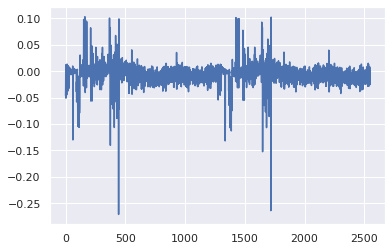

In [ ]:
#ridge bar chart
plt.plot(ridge.coef_)
plt.show()

In [ ]:
#working on brain wave dataset from here on out.

In [ ]:
#dataset
print(eeg)

      # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060        3.15  ...      

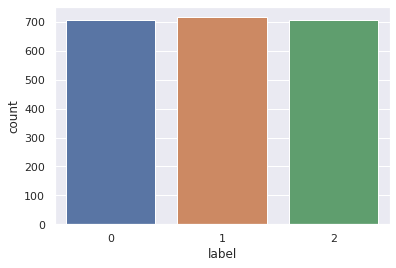

In [ ]:
import seaborn as sns
sns.countplot(x= 'label', data=eeg)

In [ ]:
eeg.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [ ]:
%matplotlib inline

import warnings
import itertools
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')

warnings.filterwarnings('ignore')


Classes are almost balanced. We can get away with the difference.
1    716
0    708
2    708
Name: label, dtype: int64


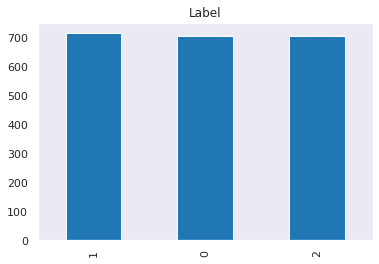

In [ ]:
print(f'Classes are almost balanced. We can get away with the difference.\n{eeg.label.value_counts()}')
eeg.label.value_counts().plot(kind='bar', color='tab:blue', title='Label')

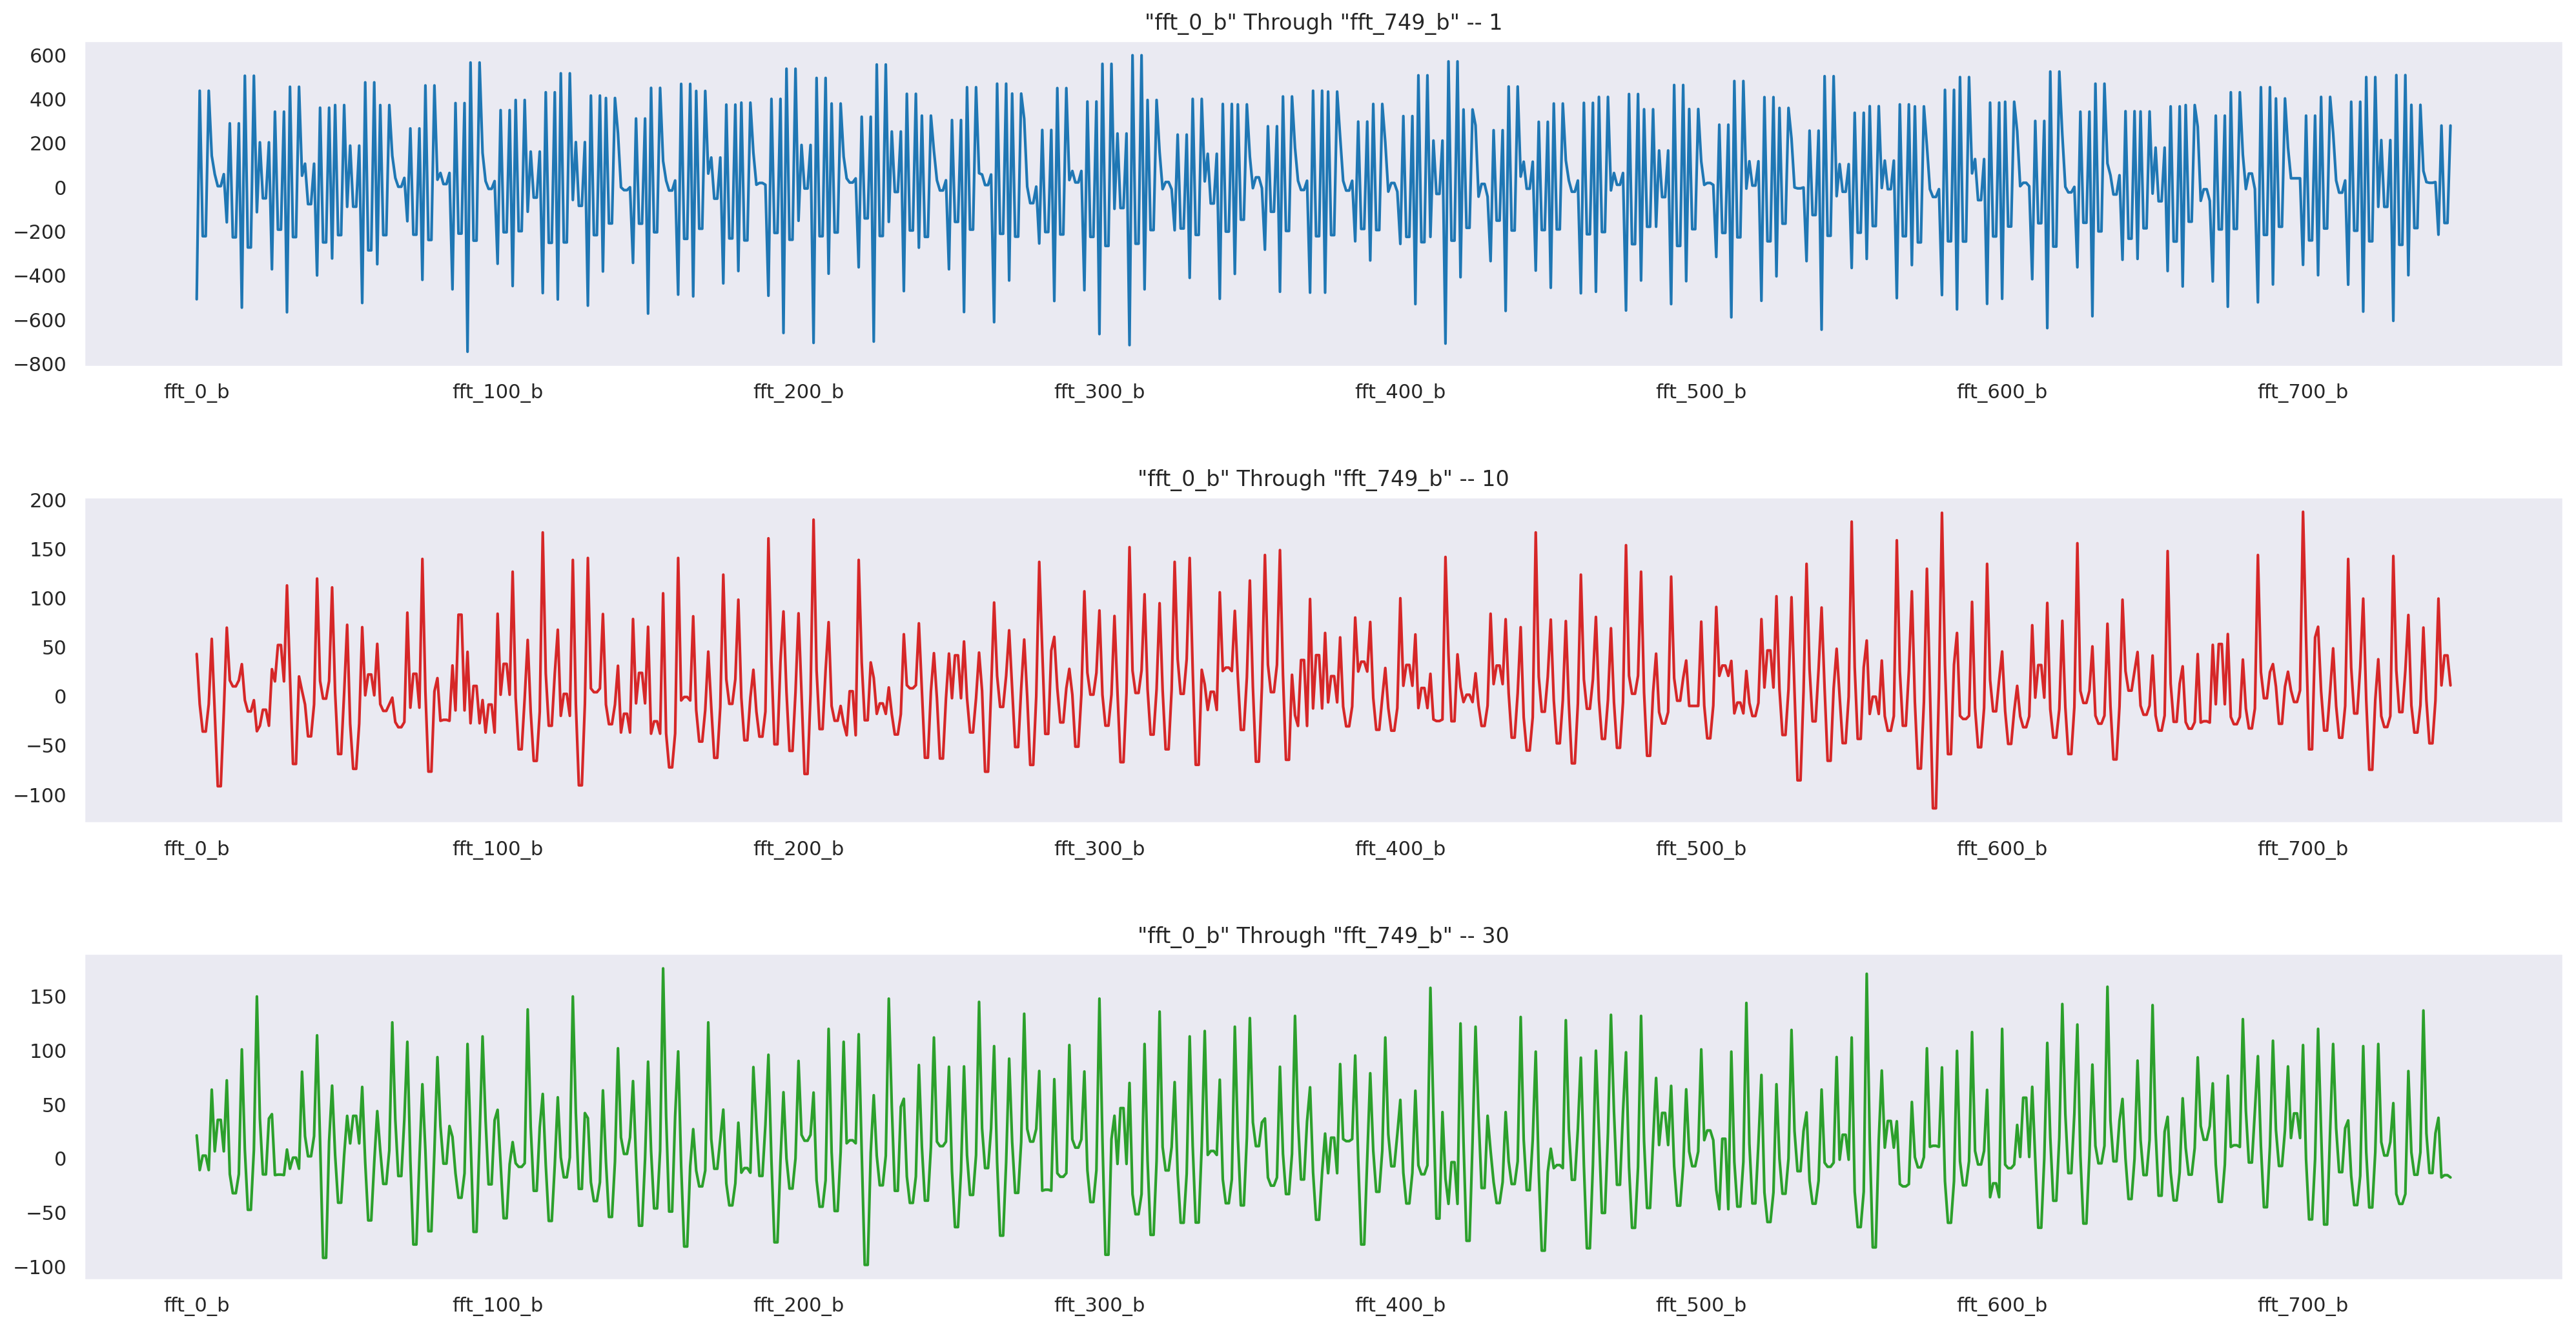

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

eeg.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
eeg.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
eeg.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1,
                    right=0.9, top=0.9,
                    wspace=0.4, hspace=0.4)

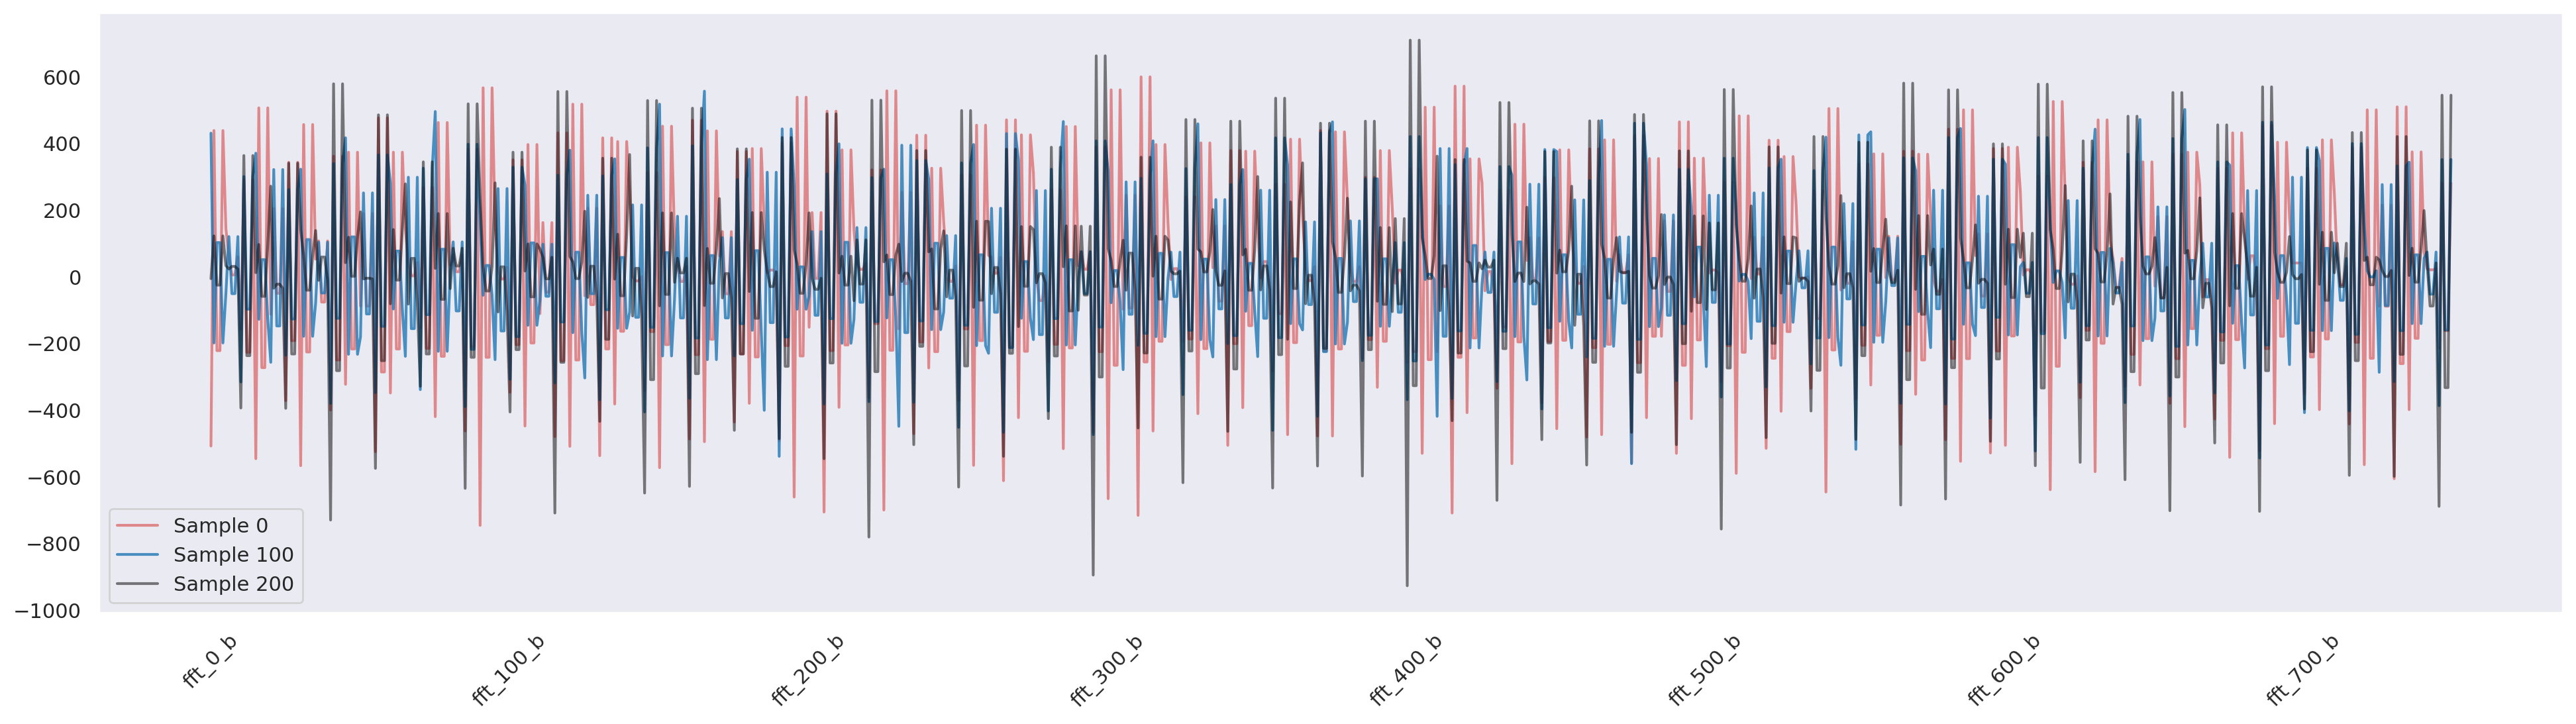

In [ ]:
plt.figure(dpi=200, figsize=(24, 6))


plt.plot(eeg.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(eeg.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(eeg.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)


plt.xticks(np.arange(0, len(eeg.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()

In [ ]:
Y = eeg['label'].copy()
X = eeg.drop('label', axis=1).copy()

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [ ]:
i_lstm = Input(shape=(X_train.shape[1], 1))

x_lstm = LSTM(256, return_sequences=True)(i_lstm)
x_lstm = Flatten()(x_lstm)
y_lstm = Dense(3, activation='softmax')(x_lstm)

model_lstm = Model(i_lstm, y_lstm)

model_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 lstm (LSTM)                 (None, 2548, 256)         264192    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,221,059
Trainable params: 2,221,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_lstm_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_lstm.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

lstm_h = model_lstm.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 10.0031 - accuracy: 0.8381
Epoch 1: val_accuracy improved from -inf to 0.83482, saving model to ./best_lstm_model.h5
33/33 [==============================] - 286s 9s/step - loss: 10.0031 - accuracy: 0.8381 - val_loss: 3.7544 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 1.6594 - accuracy: 0.9301
Epoch 2: val_accuracy improved from 0.83482 to 0.92411, saving model to ./best_lstm_model.h5
33/33 [==============================] - 306s 9s/step - loss: 1.6594 - accuracy: 0.9301 - val_loss: 1.6472 - val_accuracy: 0.9241 - lr: 9.0484e-04
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9875
Epoch 3: val_accuracy improved from 0.92411 to 0.94420, saving model to ./best_lstm_model.h5
33/33 [==============================] - 275s 8s/step - loss: 0.1433 - accuracy: 0.9875 - val_loss: 1.3318 - val_accuracy: 0.9442 - lr: 8.1873e-04
Epo

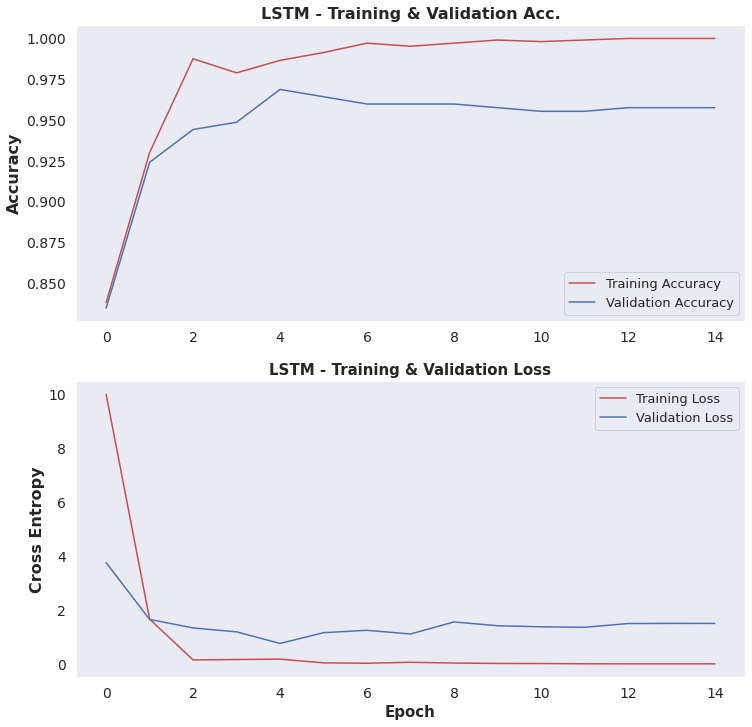

In [ ]:
acc = lstm_h.history['accuracy']
val_acc = lstm_h.history['val_accuracy']

loss = lstm_h.history['loss']
val_loss = lstm_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [ ]:
lstm_best = load_model('./best_lstm_model.h5')
lstm_acc = lstm_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc.: {:.3f}%".format(lstm_acc * 100))

Test Acc.: 95.625%


In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), lstm_best.predict(x_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

20/20 [==============================] - 48s 2s/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       190
           1       0.97      0.99      0.98       231
           2       0.97      0.90      0.93       219

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



In [ ]:
i_gru = Input(shape=(X_train.shape[1], 1))

x_gru = GRU(256, return_sequences=True)(i_gru)
x_gru = Flatten()(x_gru)
y_gru = Dense(3, activation='softmax')(x_gru)

model_gru = Model(i_gru, y_gru)

model_gru.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten_1 (Flatten)         (None, 652288)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_gru_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_gru.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

gru_h = model_gru.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 49.5195 - accuracy: 0.7653
Epoch 1: val_accuracy improved from -inf to 0.83482, saving model to ./best_gru_model.h5
33/33 [==============================] - 217s 7s/step - loss: 49.5195 - accuracy: 0.7653 - val_loss: 13.0950 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 7.7937 - accuracy: 0.8908
Epoch 2: val_accuracy improved from 0.83482 to 0.92411, saving model to ./best_gru_model.h5
33/33 [==============================] - 214s 7s/step - loss: 7.7937 - accuracy: 0.8908 - val_loss: 3.3966 - val_accuracy: 0.9241 - lr: 9.0484e-04
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 3.2451 - accuracy: 0.9397
Epoch 3: val_accuracy did not improve from 0.92411
33/33 [==============================] - 217s 7s/step - loss: 3.2451 - accuracy: 0.9397 - val_loss: 7.1423 - val_accuracy: 0.8326 - lr: 8.1873e-04
Epoch 4/50
33/33 [============================

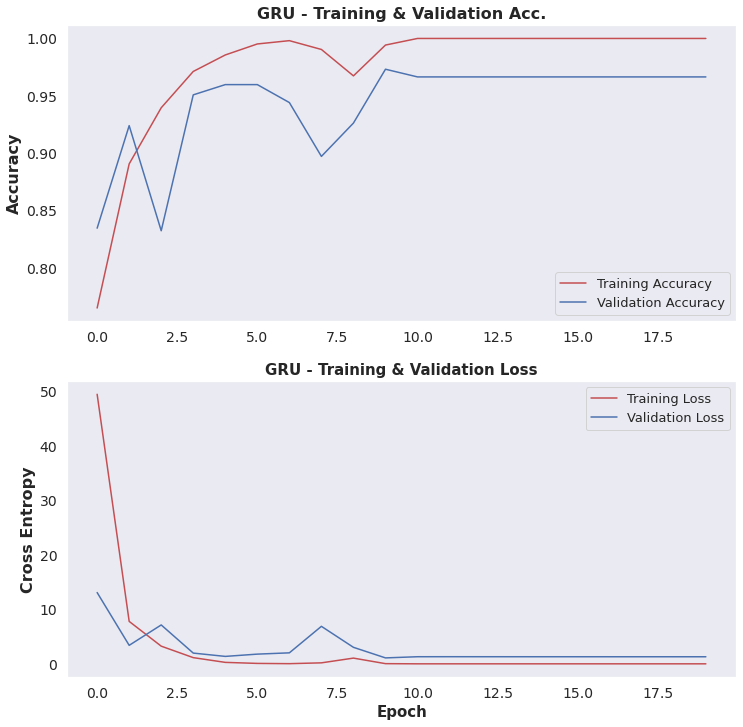

In [ ]:
acc = gru_h.history['accuracy']
val_acc = gru_h.history['val_accuracy']

loss = gru_h.history['loss']
val_loss = gru_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()